# **Analise de dados para Hotel & Resort.**

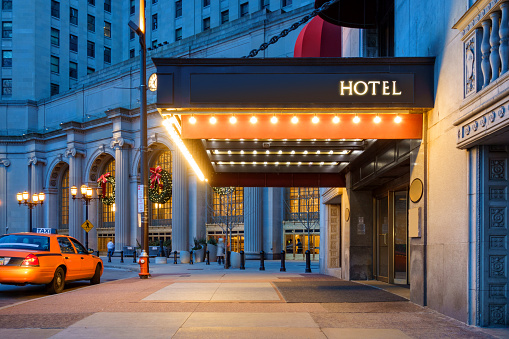

Este dataset foi baixado do site https://www.kaggle.com/ para fins didáticos simulando informações de um hotel fictício.

## Conclusões Gerais :

- Portugal é o pais com o maior numero de hospedes registrado no hotel.

- Portugal (PRT) está mais proximo da taxa de cancelamento em relação aos outros paises. sua taxa de cancelamento é de 56%

- A taxa de cancelamento de Portugal está concentrada em quartos de classe A.

- Agosto é o mês mais ocupado (mais movimentado no hotel).

- A classe de quartos mais reservada no mês de Agosto é A.

- A media de preço por noite é 102.0 Euros

- Media de estadias no Resort: 4.3 dias / Media de estadias no Hotel: 3.0 dias

### **Dataset**:

Esse dataset contem 119390 linhas de registros de reserva de um Hotel/Resort; Onde vamos usar:


*   **is_canceled**: 0 está cancelado / 1 está ativo

*   **stays_in_weekend_nights**: Quantidade de noites no final de semana

*   **stays_in_week_nights**: Quantidade de noites durante a semana

*   **arrival_date_month**: Mes chegada

*   **reservation_status**: Status da Reserva

*   **country**: País

*   **adr**: Valor da noite [EUR]

*   **children**: Crianças por família

*   **babies** : bebes por família

## 1. Importações
 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Data Wrangling

In [ ]:
data = pd.read_csv('./hotel_booking.csv')

pd.set_option('display.max_columns', 40)  # Configurando a quantidade de view rows
pd.set_option('display.max_rows', 40) # Configurando a quantidade de view columns

In [ ]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
data.head(n=1)

In [ ]:
# Identificando o numero de linhas.

#data.count(axis=0)
#data.shape[0]

rows = len(data.index)
print(f' Total numero de linhas: {rows}')

 Total numero de linhas: 119390




*   Caso exista dados ausentes, qual a coluna mais ausente?



In [ ]:

#print(missing) ----> Essa é a soma de valores ausente de cada coluna
missing = data.isnull().sum()

print(' Colunas com valores ausentes:', data.columns[data.isnull().any()].tolist())
print('-')
print(f' [ {missing.idxmax()} ] Tem o maior numero de dados ausentes {missing.max()} linhas')

 Colunas com valores ausentes: ['children', 'country', 'agent', 'company']
-
 [ company ] Tem o maior numero de dados ausentes 112593 linhas


* Dropando as colunas Company e Agent com dados ausentes. 

In [ ]:
data.drop(['agent', 'company'], inplace=False, axis=1).head(n=1) 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322


* Dropando as linhas children e country com dados ausentes

In [ ]:
data = data.dropna(subset=['children', 'country'])

* Convertendo a quantidade de crianças por reserva, para um valor do tipo inteiro.

In [ ]:
# data.dtypes
data['children'] = data['children'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 3. Analise exploratória

### 3.1 Sobre: detalhes de estadia e taxa adr.

* Quantidade de hóspedes confirmados

In [ ]:
data.query('is_canceled == 0')['arrival_date_month'].value_counts()

August       8618
July         7892
May          7102
October      6867
March        6591
April        6533
June         6393
September    6367
February     5317
November     4632
December     4365
January      4068
Name: arrival_date_month, dtype: int64



*   Qual a média de preço por noite (adr)?



In [ ]:
median_adr = data['adr'].mean()
valor = np.round(median_adr, 2)

print(f'A media de preço por noite é {valor} Euros')

A media de preço por noite é 102.0 Euros




*   Qual cliente pagou a maior (adr)?



In [ ]:
max_idr = data['adr'].idxmax()
name = data.iloc[max_idr]['name']
pay = data.iloc[max_idr]['adr']

print(f'Cliente: {name} pagou {pay} Euros')

Cliente: Samantha Torres pagou 85.5 Euros




*   Destalhes da estadia de Daniel Walter



In [ ]:
data.iloc[max_idr]

hotel                                               City Hotel
is_canceled                                                  1
lead_time                                                   68
arrival_date_year                                         2016
arrival_date_month                                       April
arrival_date_week_number                                    15
arrival_date_day_of_month                                    4
stays_in_weekend_nights                                      1
stays_in_week_nights                                         2
adults                                                       2
children                                                     0
babies                                                       0
meal                                                        SC
country                                                    GBR
market_segment                                       Online TA
distribution_channel                                   



*   Qual é a média de noites por estadia



In [ ]:
data['all_night_resort'] = data.query('hotel == "Resort Hotel"').apply(lambda x:
                                                                       x['stays_in_weekend_nights'] + x['stays_in_week_nights'], axis=1)

median_stays_resort = np.array(data['all_night_resort'].mean())

data['all_night_hotel'] = data.query('hotel == "City Hotel"').apply(lambda x:
                                                                       x['stays_in_weekend_nights'] + x['stays_in_week_nights'], axis=1)
median_stays_hotel = np.array(data['all_night_hotel'].mean())

print(f'Media de estadias no Resort: {np.round(median_stays_resort, 1)} dias')
print(f'Media de estadias no Hotel: {np.round(median_stays_hotel, 1)} dias')

Media de estadias no Resort: 4.3 dias
Media de estadias no Hotel: 3.0 dias




*   Como o preço por noite (adr) varia durante os meses do ano



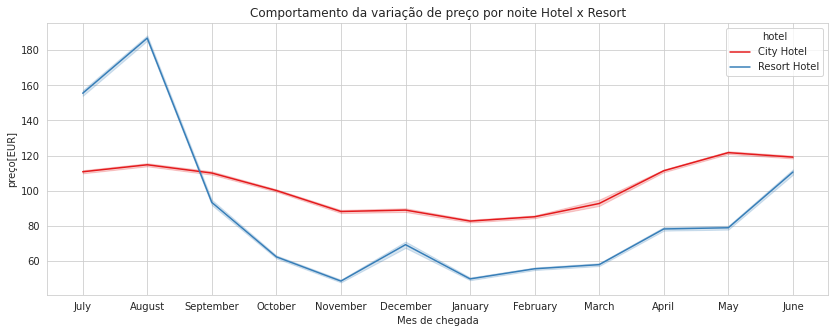

In [ ]:
plt.figure(figsize=(14,5))

with sns.axes_style('whitegrid'):
  sns.lineplot(data=data, x='arrival_date_month', y='adr', hue='hotel',
             hue_order= ['City Hotel', 'Resort Hotel'], palette = 'Set1')

plt.title('Comportamento da variação de preço por noite Hotel x Resort')
plt.xlabel('Mes de chegada')
plt.ylabel('preço[EUR]')
plt.show()



> Para Resort Hotel, o preço por noite (ADR) é mais caro durante julho, agosto e setembro

> Para City Hotel, o preço por noite (ADR) é um pouco mais caro durante março, abril e maio



In [ ]:
data[['arrival_date_month','reserved_room_type','is_canceled']].query('(arrival_date_month == "August") & (is_canceled == 0)').groupby(
    ['reserved_room_type','arrival_date_month']).count().reset_index().head()

,reserved_room_type,arrival_date_month,is_canceled
0,A,August,5374
1,B,August,127
2,C,August,174
3,D,August,1732
4,E,August,588




> A classe de quartos mais reservada no mês de Agosto é A.



### 3.2 Sobre: ranking de confirmações e países.

* Os 5 paises com maior numero de hóspedes.

In [ ]:
data['country'].value_counts()[:5]

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64



> Portugal é o país com o maior numero de hospedes registrado no hotel.



In [ ]:
data['country'].value_counts(normalize=True)[:10]

PRT    0.408636
GBR    0.102012
FRA    0.087596
ESP    0.072062
DEU    0.061288
ITA    0.031674
IRL    0.028386
BEL    0.019698
BRA    0.018705
NLD    0.017696
Name: country, dtype: float64

* Taxa de cancelamento do país com mais reservas (Portugal)

In [ ]:
data.query('country == "PRT"').value_counts(subset=data['is_canceled'],normalize=True)[:10]

is_canceled
1    0.566315
0    0.433685
dtype: float64



> Portugal tem uma taxa de cancelamento de 56%, maior que sua taxa de confirmados.



* Como a taxa de cancelamento varia durante os meses do ano entre os  paises com mais hospedes.

In [ ]:
ranking_country = list(data['country'].value_counts()[:5].index)
ranking_country = data[data['country'].isin(ranking_country)]

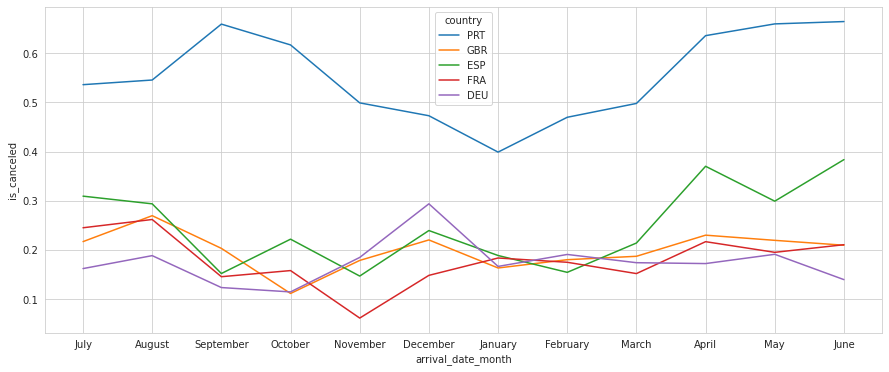

In [ ]:
plt.figure(figsize=(15,6))

with sns.axes_style('whitegrid'): 
  sns.lineplot(data=ranking_country, y='is_canceled', x='arrival_date_month', hue='country', ci=None)



> Portugal (PRT) está mais proximo da taxa de cancelamento em relação aos outros paises. 



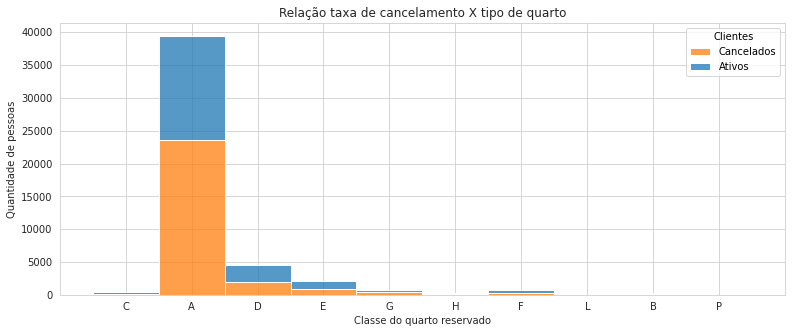

In [ ]:
plt.figure(figsize=(13,5))

with sns.axes_style('whitegrid'):
  grafico = sns.histplot(data=ranking_country.query('country == "PRT"'), x='reserved_room_type', hue='is_canceled', multiple='stack')

  grafico.set(title='Relação taxa de cancelamento X tipo de quarto',
              xlabel='Classe do quarto reservado',
              ylabel='Quantidade de pessoas')


plt.legend(title='Clientes', labels=['Cancelados', 'Ativos'])



> Portugal tem a taxa de cancelamento concentrada em quartos de classe A.





* Vamos observar os meses com mais movimentação de clientes durante esses anos.



In [ ]:
not_is_canceled = data.groupby(['arrival_date_month']).apply(lambda x: x[x['is_canceled'] == 0]['is_canceled'].count()).reset_index()
not_is_canceled = not_is_canceled.rename(columns={0:'ativos'})

In [ ]:
is_canceled = data.groupby(by=['arrival_date_month']).apply(lambda x: x[x['is_canceled'] == 1]['is_canceled'].count()).reset_index()
is_canceled = is_canceled.rename(columns={0:'cancelados'}) # Organizando colunas 

In [ ]:
data['total_hospedes'] = data.apply(lambda x: x['adults'] + x['children'] + x['babies'], axis=1) # Criando coluna total
df_total_month = data.groupby(by=["arrival_date_month"]).sum()["total_hospedes"].reset_index() # Agrupando a soma em relação de meses

In [ ]:
clientes = pd.merge(is_canceled, not_is_canceled, on='arrival_date_month')
clientes_month = pd.merge(clientes, df_total_month, on='arrival_date_month')

In [ ]:
clientes_month.sort_values(by=['total_hospedes'], ascending=False)

,arrival_date_month,cancelados,ativos,total_hospedes
1,August,5234,8618,30716
5,July,4736,7892,27552
8,May,4677,7102,22442
0,April,4512,6533,21948
6,June,4534,6393,21466
10,October,4228,6867,20945
11,September,4100,6367,20293
7,March,3148,6591,18364
3,February,2695,5317,15224
2,December,2363,4365,13127


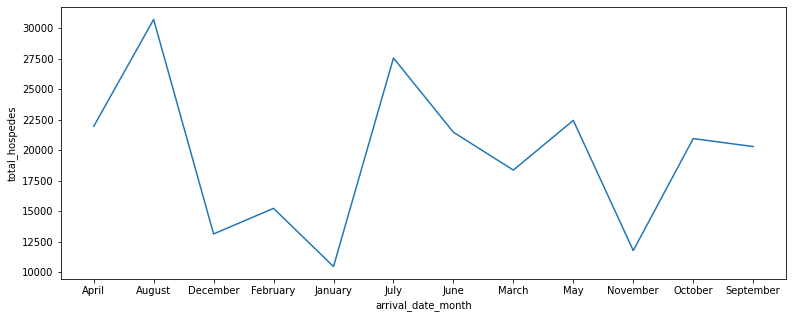

In [ ]:
plt.figure(figsize=(13,5))

sns.lineplot(data=clientes_month, y=clientes_month.total_hospedes, x=clientes_month.arrival_date_month, ci=None)

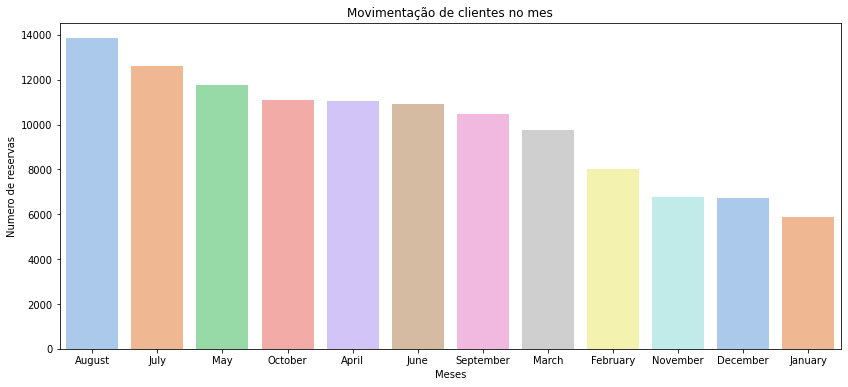

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=data , x='arrival_date_month', palette='pastel',
              order=pd.value_counts(data['arrival_date_month']).index)

plt.title('Movimentação de clientes no mes')
plt.xlabel('Meses')
plt.ylabel('Numero de reservas')
plt.show()

# Alterar esse grafico para linhas e verificar metodo show()

> Os gráfico acima mostra o número de reservas criadas para cada mês e de acordo com os dados, **agosto** é o mês mais ocupado (mais movimentado no hotel)

### 3.3 Sobre: Pesquisa de satisfação e marketing.



*   Filtrando o nome e E-mail dos clientes com crianças e bebes para eventuais promoções.



In [ ]:
data['client_baby_and_children'] = data.apply(lambda x: x['children'] + x['babies'], axis=1 )
data.sort_values(by=['client_baby_and_children'], ascending=False)[['name','email','client_baby_and_children']][:10]

,name,email,client_baby_and_children
46619,Nicholas Parker,Parker.Nicholas57@hotmail.com,10
328,Jamie Ramirez,Ramirez_Jamie22@aol.com,10
78656,Marc Robinson,Robinson_Marc@protonmail.com,9
92415,Alexis Wilson,Alexis.Wilson@comcast.net,3
26613,Philip Kaiser,PKaiser@verizon.com,3
109194,Alejandro James,Alejandro.J51@gmail.com,3
48412,Christopher Holmes,CHolmes@outlook.com,3
54886,Renee Turner,Turner_Renee21@hotmail.com,3
31863,Molly Torres,Molly_Torres84@aol.com,3
115891,Anne Wilson,AnneWilson98@verizon.com,3




*   Vamos visualizar separadamente a quantidade de reservas canceladas no hotel e resort.



In [ ]:
data['is_canceled'].value_counts(normalize=True)

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64

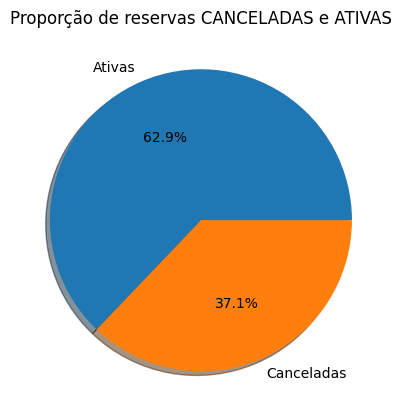

In [ ]:
plt.figure(figsize=(7,5) , dpi=100)

proportion = data['is_canceled'].value_counts()

labels = ['Ativas','Canceladas']
plt.title('Proporção de reservas CANCELADAS e ATIVAS')

plt.pie(proportion, labels=labels, shadow = True, autopct = '%1.1f%%')
plt.show()

> Para uma eventual pesquisa de satisfação, vamos recolher os dados dos clientes com cancelamento de reserva e oferecer um desconto na proxima hospedagem após um questionario.


In [ ]:
client_canceled = data.query('is_canceled == 1')[['name', 'email', 'phone-number', 'country']]
client_canceled.head()

,name,email,phone-number,country
8,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,PRT
9,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,PRT
10,Priscilla Collins PhD,PhD.Priscilla74@att.com,833-887-7898,PRT
27,Jaime Flynn,JaimeFlynn29@gmail.com,549-866-3721,PRT
32,Reginald Cunningham,Reginald_C57@outlook.com,800-249-2144,PRT
